In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# Read in weather dataset

weather = pd.read_csv('Data/Ruby_Weather_Data_2020.csv')

In [4]:
weather.columns

Index(['Date & Time', 'Temp ', 'Hum', 'Dew Point', 'Avg Wind Speed',
       'Prevailing Wind Direction', 'Wind Chill', 'Heat Index', 'Rain',
       'Heating Degree Days', 'Cooling Degree Days', 'Harvest Day'],
      dtype='object')

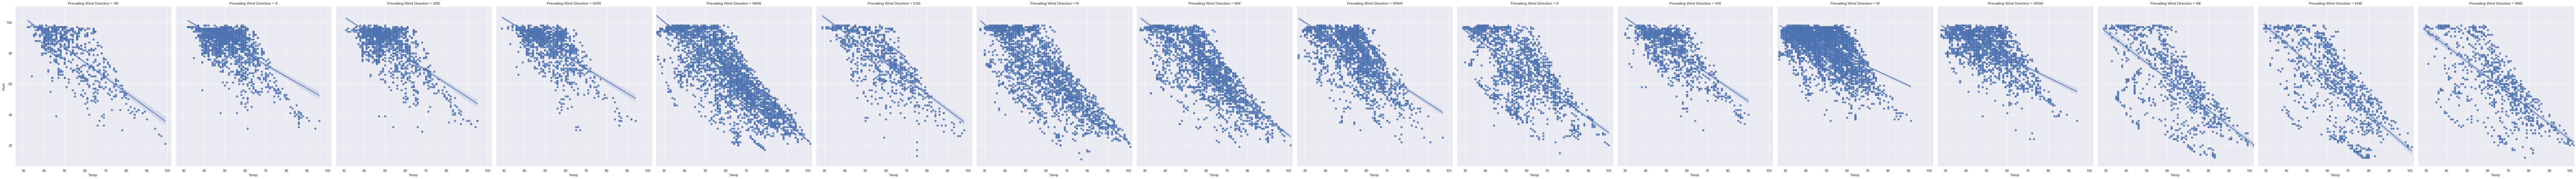

In [29]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lmplot(x='Temp ',y='Hum',data=weather,
          col='Prevailing Wind Direction',
          aspect=.9,
          height=8)

In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [145]:
#Prepare data for model insertion

X = np.array(weather['Heating Degree Days'])

X= X.reshape(-1,1)
y = weather['Temp ']

In [146]:
model.fit(X, y)

LinearRegression()

In [147]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [-118.15715057]
y-axis intercept:  69.93849225054217


In [148]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 46.0
Predicted output: 47.48863364251761
Prediction Error: 1.4886336425176125


In [149]:
regression_df = pd.DataFrame({"Predicted": predictions, 
                              "Actual": y, 
                              "Error": predictions - y})[["Predicted", "Actual", "Error"]]

regression_df

,Predicted,Actual,Error
0,47.488634,46.0,1.488634
1,47.488634,46.0,1.488634
2,46.307062,46.0,0.307062
3,46.307062,46.0,0.307062
4,47.488634,46.0,1.488634
...,...,...,...
32346,48.670205,48.0,0.670205
32347,48.670205,47.0,1.670205
32348,48.670205,48.0,0.670205
32349,48.670205,47.0,1.670205


In [150]:
weather.dtypes

Date & Time                   object
Temp                         float64
Hum                          float64
Dew Point                    float64
Avg Wind Speed               float64
Prevailing Wind Direction     object
Wind Chill                   float64
Heat Index                   float64
Rain                         float64
Heating Degree Days          float64
Cooling Degree Days          float64
Harvest Day                  float64
dtype: object

In [151]:
#Prepare data for model insertion

X = weather[['Temp ','Rain','Heating Degree Days']]
y = weather['Harvest Day']

In [152]:
#import train test split,

from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [154]:
#Import Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [155]:
weather_model = LogisticRegression()

In [156]:
weather_model.fit(X_train,y_train)

LogisticRegression()

In [157]:
predictions = weather_model.predict(X_test)

In [158]:
# Import library to evaluate the model

from sklearn.metrics import classification_report

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9675
         1.0       0.00      0.00      0.00        31

    accuracy                           1.00      9706
   macro avg       0.50      0.50      0.50      9706
weighted avg       0.99      1.00      1.00      9706



C:\Users\Jarrod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
confusion_matrix(y_test, predictions)

array([[9675,    0],
       [  31,    0]], dtype=int64)

In [162]:
# plt.scatter(y_test,predictions)
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')

In [163]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0031939006799917577
MSE: 0.0031939006799917577
RMSE: 0.056514605899641183


In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
weather_forest = RandomForestClassifier(n_estimators=100)

In [166]:
weather_forest.fit(X_train,y_train)

RandomForestClassifier()

In [167]:
y_pred=weather_forest.predict(X_test)

In [168]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9968060993200082


In [169]:
feature_imp = pd.Series(weather_forest.feature_importances_).sort_values(ascending=False)
feature_imp

0    0.534782
2    0.391118
1    0.074100
dtype: float64

<AxesSubplot:>

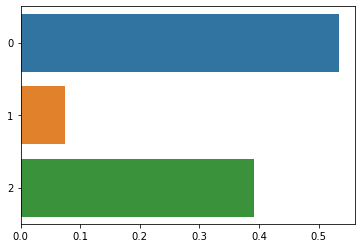

In [170]:
sns.barplot(x=feature_imp, y=feature_imp.index,orient='h')